# Проектный практикум  
____
Кейс №2 - Ваганов А.А., Валова Е.В., Волык И.Я.

## Импорты библиотек

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# автоматически правит стиль под PEP8
%load_ext jupyter_black

## Описание полей исходной таблицы
- user_id — id пользователя;

- survey_creation_dt — дата создания опроса;

- survey_response_dt — дата ответа на опрос;

- language — язык пользователя;

- age — возраст пользователя;

- gender — пол пользователя;

- tenure_years — стаж пользователя в годах;

- user_income — доход пользователя;

- csat_level — оценка пользователя.

# Чтение данных

In [2]:
df_path = "app_survey.csv"

df = pd.read_csv(df_path)

df.head()

,user_id,survey_creation_dt,survey_response_dt,csat_level,language,age,gender,tenure_years,user_income
0,user_00000,2025-04-28 16:01:51,2025-05-07 03:24:28,1,RU,35-44,M,21.105392,10000-25000
1,user_00001,2025-04-25 03:02:23,2025-04-29 13:12:29,5,RU,35-44,M,21.129793,68000-100000
2,user_00002,2025-04-30 11:02:14,2025-04-20 21:09:01,5,RU,45-54,M,21.098074,NaN
3,user_00003,2025-04-25 09:32:18,2025-04-26 19:51:12,5,RU,45-54,M,21.115544,25000-44000
4,user_00004,2025-04-30 08:32:06,2025-05-01 18:33:35,5,RU,45-54,M,21.127961,44000-68000


## Чистка данных

In [3]:
display(df.describe())

,csat_level,tenure_years
count,42387.000000,42387.000000
mean,4.102767,9.801147
std,1.506246,7.591410
min,1.000000,0.000000
25%,4.000000,2.132807
50%,5.000000,9.308819
75%,5.000000,16.941052
max,5.000000,21.195642


In [4]:
# меняю формат на дату
df["survey_creation_dt"] = pd.to_datetime(df["survey_creation_dt"])
df["survey_response_dt"] = pd.to_datetime(df["survey_response_dt"])

# выделяю только числовую часть id
df["user_id"] = df["user_id"].str[-5:].astype(int)

In [5]:
# проверяю типы данных
display(df.dtypes)

user_id                        int64
survey_creation_dt    datetime64[ns]
survey_response_dt    datetime64[ns]
csat_level                     int64
language                      object
age                           object
gender                        object
tenure_years                 float64
user_income                   object
dtype: object

In [6]:
# смотрю процент пропусков

display(df.isnull().sum() / df.isnull().count() * 100)

user_id                0.000000
survey_creation_dt     0.000000
survey_response_dt     0.000000
csat_level             0.000000
language              16.103994
age                    3.416142
gender                 0.000000
tenure_years           0.000000
user_income           24.474485
dtype: float64

## Функции для визуализации

In [7]:
def make_plot(x, y, x_label, y_label, title):
    """
    Создает красивый линейный график
    """
    plt.style.use("default")

    fig, ax = plt.subplots(figsize=(14, 7))

    fig.patch.set_facecolor("white")
    ax.set_facecolor("white")

    ax.plot(
        x,
        y,
        linewidth=2.5,
        color="royalblue",
        marker="o",
        markersize=6,
        markerfacecolor="white",
        markeredgewidth=2,
    )

    ax.set_xlabel(x_label, fontsize=12, fontweight="bold")
    ax.set_ylabel(y_label, fontsize=12, fontweight="bold")
    ax.set_title(title, fontsize=16, fontweight="bold", pad=20)

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    ax.spines["left"].set_color("#d4d4d4")
    ax.spines["bottom"].set_color("#d4d4d4")

    ax.grid(False)

    plt.tight_layout()
    plt.show()

In [8]:
def make_bar_plot(x, y, x_label, y_label, title, color="royalblue", show_values=False):
    """
    Создает красивую столбчатую диаграмму
    """
    plt.style.use("default")

    fig, ax = plt.subplots(figsize=(14, 7))

    fig.patch.set_facecolor("white")
    ax.set_facecolor("white")

    bars = ax.bar(
        x,
        y,
        color=color,
        alpha=0.8,
        linewidth=1.5,
        width=0.4,
    )

    if show_values:
        for bar in bars:
            height = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + (max(y) * 0.01),
                f"{height:.2f}",
                ha="center",
                va="bottom",
                fontsize=10,
                fontweight="bold",
            )

    ax.set_xlabel(x_label, fontsize=12, fontweight="bold")
    ax.set_ylabel(y_label, fontsize=12, fontweight="bold")
    ax.set_title(title, fontsize=16, fontweight="bold", pad=20)

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    ax.spines["left"].set_color("#d4d4d4")
    ax.spines["bottom"].set_color("#d4d4d4")

    ax.grid(False)

    ax.set_ylim(bottom=0, top=max(y) * 1.15)

    plt.tight_layout()
    plt.show()

## Гипотезы

Гипотеза: "Возможные изменения в мобильном приложении повлияли на пользовательские оценки CSAT"  
❌ Гипотеза не подтверждается  
Если бы изменения в приложении повлияли на CSAT, на графике были бы заметны резкие спады или подъёмы в конкретные даты. Но динамика плавная, без выраженных пиков — значит, единовременные изменения не оказали значимого эффекта на оценки.

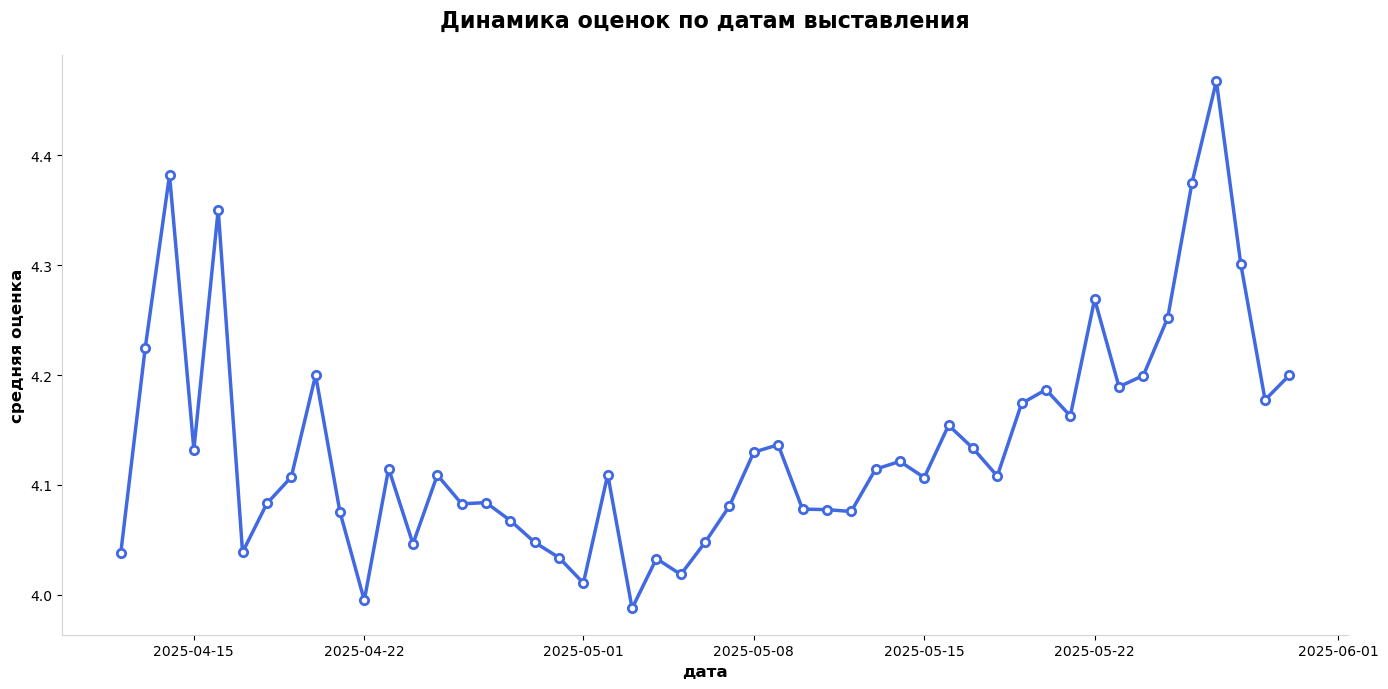

In [9]:
daily_avg = df
daily_avg["survey_response_dt"] = daily_avg["survey_response_dt"].dt.date
daily_avg = daily_avg.groupby("survey_response_dt")["csat_level"].mean().reset_index()
make_plot(
    daily_avg["survey_response_dt"],
    daily_avg["csat_level"],
    "дата",
    "средняя оценка",
    "Динамика оценок по датам выставления",
)

Гипотеза: "Мужчины ставят оценку в среднем выше, чем женщины/Мужчинам больше нравится приложение"  
✅ Гипотеза подходит для проверки статистической значимости

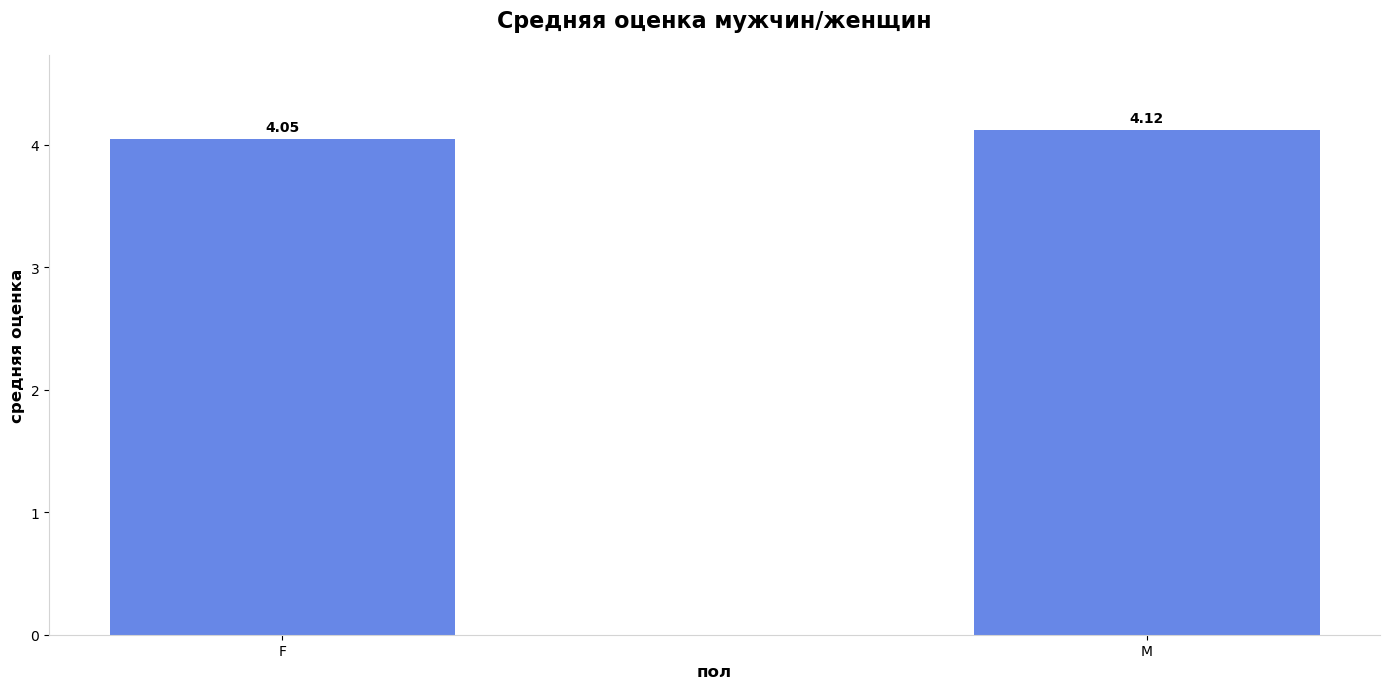

In [10]:
gender_avg = df
gender_avg = gender_avg.groupby("gender")["csat_level"].mean().reset_index()
make_bar_plot(
    gender_avg["gender"],
    gender_avg["csat_level"],
    "пол",
    "средняя оценка",
    "Средняя оценка мужчин/женщин",
    color="royalblue",
    show_values=True,
)